In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing dataset

In [133]:
df = pd.read_csv("Airbnb_Open_Data.csv", header=0)
df.head(5)

C:\Users\victo\AppData\Local\Temp\ipykernel_42404\3538998006.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Airbnb_Open_Data.csv", header=0)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


### Data Cleaning

##### Fixing column names

In [134]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [135]:
# Convert all column names into lowercase and remove whitespaces

df.columns=[col.lower().replace(" ","_") for col in df.columns]
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

##### Cleaning by Column

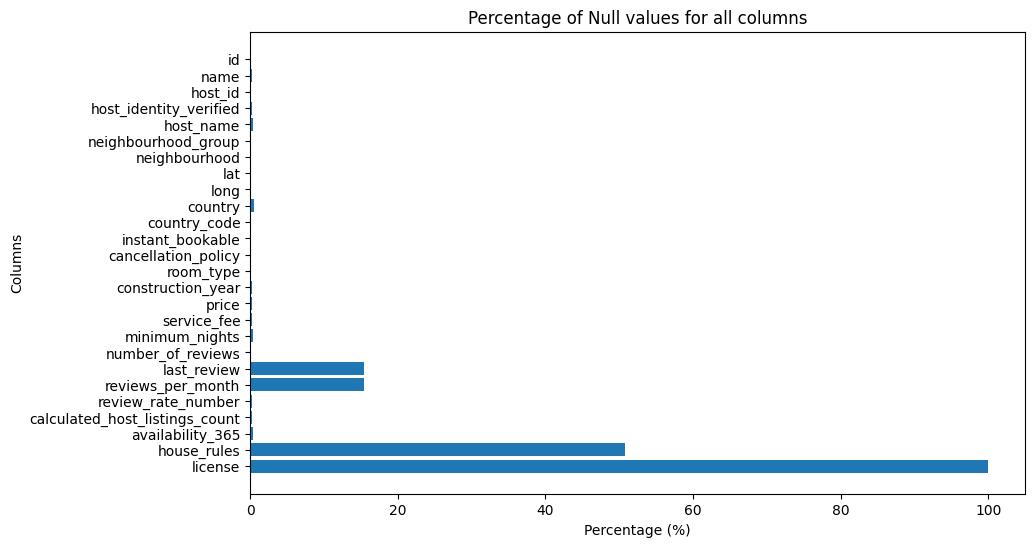

In [136]:
# Count the percentage of missing values in every column and plot the result

# Calculate the percentage
percentage_result = df.isnull().sum() / df.shape[0] * 100

# Storing results in a dataframe to make things easier
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "%": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 6))

# Plotting the horizontal bar plot
plt.barh(percentage_result["columns"], percentage_result["%"])
plt.xlabel("Percentage (%)")
plt.ylabel("Columns")
plt.title("Percentage of Null values for all columns")
plt.gca().invert_yaxis() 
plt.show()

In [137]:
df.isnull().sum().sort_values(ascending=False)

license                           102597
house_rules                        52131
last_review                        15893
reviews_per_month                  15879
country                              532
availability_365                     448
minimum_nights                       409
host_name                            406
review_rate_number                   326
calculated_host_listings_count       319
host_identity_verified               289
service_fee                          273
name                                 250
price                                247
construction_year                    214
number_of_reviews                    183
country_code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood_group                   29
neighbourhood                         16
long                                   8
lat                                    8
id                                     0
host_id         

In [138]:
df.shape

(102599, 26)

There are only 102599 rows to this dataset, but there are 102597 null values in the license column, meaning the column only has 2 non-null values. There are also a high number of NaN values in house_rules. We will delete both of them.

In [139]:
df.loc[~df.license.isnull()]

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
11114,7139598,"Cozy 1 BR on Bedford Avenue, Wburg",73023181304,verified,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,191.0,"Dear Guest, Thank you for appreciating that I ...",41662/AL
72947,41289964,"Cozy 1 BR on Bedford Avenue, Wburg",25804773951,unconfirmed,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,0.0,NaN,41662/AL


In [140]:
# It seems the license is nothing important so we will drop it
# house_rules has high number of NaN values and it seems irrelevant so we will also drop it

df.drop(columns = ["license", "house_rules"], axis=1, inplace=True)

In [141]:
df.loc[~df.last_review.isnull()].head(3)

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0


last_review has a high percentage of Null values, but it contains useful information, so we will keep the column.

In [142]:
df["last_review"] = pd.to_datetime(df["last_review"])

In [143]:
# Impute null values to median

df.loc[df['last_review'].isnull(), 'last_review'] = df['last_review'].median()

In [144]:
# Checking for bogus values
df['last_review'].min(), df['last_review'].max()

(Timestamp('2012-07-11 00:00:00'), Timestamp('2058-06-16 00:00:00'))

In [145]:
# All last_review entries after 2022 (year the data was collected) is incorrect

df[df['last_review'].apply(lambda x: x.year) > 2022]

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
127,1071478,Garden studio in the Upper East Sid,77172555024,unconfirmed,Miller,Manhattan,Upper East Side,40.77800,-73.94822,United States,...,2007.0,$571,$114,5.0,21.0,2024-08-15,0.19,4.0,NaN,395.0
191,1106825,LUX APT IN TIMES SQUARE NEW BUILDING,93725364475,unconfirmed,Aiden,Manhattan,Hell's Kitchen,40.76307,-73.99665,United States,...,NaN,$539,$108,NaN,41.0,2025-06-26,0.38,2.0,1.0,NaN
255,1142173,Beautiful Landmarked Duplex,87944779917,NaN,Baker,Brooklyn,Greenpoint,40.72945,-73.95511,United States,...,2008.0,$842,$168,3.0,124.0,2058-06-16,1.22,4.0,3.0,230.0
318,1176967,NaN,70084472212,verified,Barnes,Brooklyn,Greenpoint,40.72488,-73.95018,United States,...,2018.0,$920,$184,2.0,1.0,2026-03-28,0.01,3.0,1.0,73.0
483,1268097,Modern Space in Charming Pre-war,13746585241,verified,Adelaide,Manhattan,Harlem,40.82411,-73.94934,United States,...,NaN,$721,$144,2.0,41.0,2040-06-16,0.43,3.0,2.0,47.0


In [146]:
# We will use the median date for the wrong time stamps

df.loc[df[df['last_review'].apply(lambda x: x.year) > 2022].index, 'last_review'] = df['last_review'].median()

In [147]:
# Replace null values in reviews_per_month with median

df.loc[df['reviews_per_month'].isnull(), 'reviews_per_month'] = df['reviews_per_month'].median()

In [148]:
print(f'Portion of unique values for id column:', df["id"].unique().shape[0]/df["id"].shape[0]*100)
print(f'Portion of unique values for host_id column:', df["host_id"].unique().shape[0]/df["host_id"].shape[0]*100)

Portion of unique values for id column: 99.47270441232371
Portion of unique values for host_id column: 99.47172974395461


In [149]:
# Since both columns are almost entirely unique values, we will delete them

df.drop(columns = ["id", "host_id"], axis=1, inplace=True)

In [150]:
df["country"].value_counts()

country
United States    102067
Name: count, dtype: int64

In [151]:
df["country_code"].value_counts()

country_code
US    102468
Name: count, dtype: int64

In [152]:
# There are no variations in country and country_code, so we will delete them

df.drop(columns = ["country_code", "country"], axis = 1, inplace = True)

In [153]:
df['room_type'].value_counts()

room_type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64

room_type seems balanced with unique values, and has no null values, so we will leave it.

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   name                            102349 non-null  object        
 1   host_identity_verified          102310 non-null  object        
 2   host_name                       102193 non-null  object        
 3   neighbourhood_group             102570 non-null  object        
 4   neighbourhood                   102583 non-null  object        
 5   lat                             102591 non-null  float64       
 6   long                            102591 non-null  float64       
 7   instant_bookable                102494 non-null  object        
 8   cancellation_policy             102523 non-null  object        
 9   room_type                       102599 non-null  object        
 10  construction_year               102385 non-null  float64

In [155]:
# We see that price and object are type object, but we want float64 for EDA later, 
# so we will clean these columns by removing symbols

def remove_dollar_symbol(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float(value.replace("$","").replace(",","").replace(" ",""))

In [156]:
df["price"] = df["price"].apply(lambda x: remove_dollar_symbol(x))
df["service_fee"]=df["service_fee"].apply(lambda x: remove_dollar_symbol(x))

In [162]:
print(f'Dtype for price and service_fee:', df['price'].dtype, df['service_fee'].dtype)

Dtype for price and service_fee: float64 float64


In [164]:
# Transforming these columns into int16 because they will not have 
df["minimum_nights"] = np.array(df["minimum_nights"], dtype = np.int16)